<div style="text-align: right"> CS801 - Lab 5b (2020) </div>

# Example 1 from the 'Swedish Fish Inc'

### Rasmus Bååth (adapted for Python by Christophe Carvenius, with some modifications by Crawford Revie)

These exercises are related to some examples of Bayesian Data Analysis in a series of videos by Ramsus Bååth that are referenced on the MyPlace pages. You should really watch the first 20 minutes of his video, "What is Bayes?" before you take a stab at the first example below to get a sense for what we are trying to achieve.


Swedish Fish Incorporated is the largest Swedish company delivering fish by mail order. They are now trying to get into the lucrative Danish market by selling one year salmon subscriptions. The marketing department have run a pilot study and set up a marketing approach, that we will refer to as "Method A":

**Method A:** Mail out a colorful brochure that invites people to sign up for the one year salmon subscription.

The marketing department sent out 16 mails according to Method A. Six Danes who received the brochure signed up for a salmon subscription and the marketing department now wants to know, how good Method A is?


### We will use a Bayesian model to address this question. This will help us answer questions like, "what would the rate of sign-up be if Method A was used on a much larger number of people?"

A few things to note:

**Note 1:** The answer is not a single number but a distribution over probable rates of sign-up.

**Note 2:** We will use a simple 'generative model', which will here be the Binomial distribution. We can sample this within Python using the `np.random.binomial(n, p, size)` function. The binomial distribution simulates the process n times: The number of `successes` when performing size trials, where the probability of `success` is p.

**Note 3:** A commonly used prior for the unknown probability of success in a Binomial distribution is a `uniform` distribution from 0 to 1. You can draw from this distribution by running `np.random.uniform(0, 1, size = n_draws)`

**Note 4:** I have provided some code below, but it is only one of a number of ways to tackle this problem. Hopefully it can also provide a useful 'scaffold' for some of the extensions that you are asked to build in later exercises.


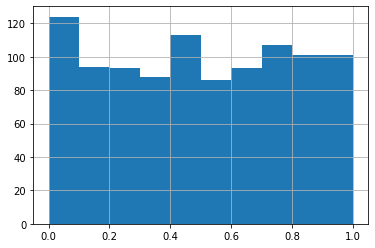

In [29]:
# Import some useful Python libraries

import pandas as pd
import numpy as np

# Number of random draws from the prior   (start with 1,000 - later you can try different options)
n_draw = 1000

# Defining and drawing from the prior distribution 
prior_rate = pd.Series(np.random.uniform(0, 1, size = n_draw)) 

# It's always good to eyeball the prior to make sure it looks ok.
prior_rate.hist() 

#### Running over a larger set of trials (draws)

Your histogram may look a bit 'staggered' so you may wish to set the number of draws to 10,000 and see how things look.


### Turning a prior into a posterior

We now have our prior distribution - an 'uninformative' uniform distribution in the first instance. We are now ready to generate a posterior distribution from this, using our 'generative' model, which in this case is a simple `Binomial` model that returns the number of `successes` (out of 16) for various p-values, as defined in our `prior`.


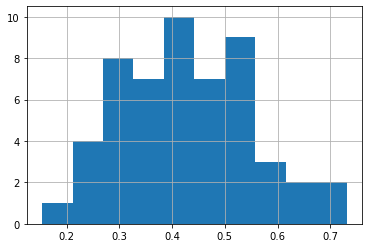

In [30]:
# Defining the generative model
def gen_model(prob):
    return(np.random.binomial(16, prob))


# A list into which we will collect the outputs from our generative model
subscribers = list()

# Simulating the data (using the 'prior' set up on the last cell)
for p in prior_rate:
    subscribers.append(gen_model(p))

    
# Now we want to compare the outputs from the generative model with the data we actually observed.

# Observed data in our marketing exerise with 16 mailed out brochures
observed_data = 6

# Here we apply a filter so that we only end up with the draws that match our data.
# There are likely some new Python commands here so you may wish to look those up.

post_rate = prior_rate[list(map(lambda x: x == observed_data, subscribers))]

# Eyeball the posterior
post_rate.hist()  


Number of draws left: 53, Posterior mean: 0.430, Posterior median: 0.426, Posterior 95% quantile interval: 0.214-0.697


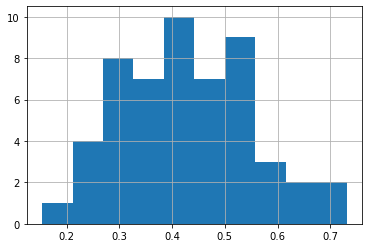

In [31]:
# After the filtering we don't have that many draws left. 
# As a rule of thumb we should aim for >1000 draws to get an more informative summary.

# So go back to the 'prior' stage and increase the number of initial draws to 10,000 or even 50,000.

# New posterior
post_rate.hist()

# With a larger sample we can also summarize the posterior, where a common summary would be to take the mean
# or the median posterior, as well as the 95% quantile interval.

print('Number of draws left: %d, Posterior mean: %.3f, Posterior median: %.3f, Posterior 95%% quantile interval: %.3f-%.3f' % 
      (len(post_rate), post_rate.mean(), post_rate.median(), post_rate.quantile(.025), post_rate.quantile(.975)))



Question 1, What’s the probability that Method A is better than telemarketing? (SUBMIT)
----------------
So marketing just told us that the rate of sign-up would be 20% if salmon subscribers were snared by a telemarketing campaign instead (to us it’s very unclear where marketing got this very precise number from). So given the model and the data that we developed in the last question, what’s the probability that method A has a higher rate of sign-up than telemarketing?

**Hint 1:** If you have a vector of samples representing a probability distribution, which you should have from the last question, calculating the amount of probability above a certain value is done by simply *counting* the number of samples above that value and dividing by the total number of samples.

**Hint 2:** The answer to this question only requires a single line of code ;-)


In [32]:
sum(post_rate > 0.2) / len(post_rate)

0.9811320754716981

Question 2, If Method A was used on 500 people what would be the likely number of sign-ups?
--------------

**Hint 1:** The answer is *not* a single number but a *distribution* over the probable number of sign-ups.

**Hint 2:** As before, the Binomial distribution is a good candidate for how many people who might sign up out of the 500 possible.

**Hint 3:** Make sure you don’t “throw away” uncertainty, for example by using a summary of the posterior distribution calculated in the first part of the exercise. Try to find a way to use the full original posterior sample!

**Hint 4:** The general pattern when calculating “derivatives” of posterior samples is to go through the values one-by-one, and perform a transformation (say, plugging in the value in a Binomial distribution), and collect the new values in a vector.


In [35]:
import matplotlib.pyplot as plt 

(array([ 2.,  4.,  5.,  8., 12.,  8.,  7.,  3.,  2.,  2.]),
 array([ 80. , 108.7, 137.4, 166.1, 194.8, 223.5, 252.2, 280.9, 309.6,
        338.3, 367. ]),
 <a list of 10 Patch objects>)

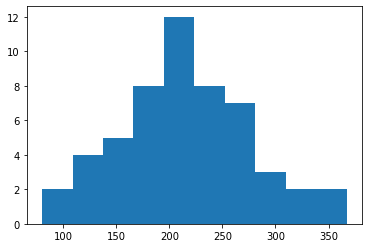

In [53]:
no_signups = list()

for p in post_rate:
    no_signups.append(np.random.binomial(500, p))
    
plt.hist(no_signups, 10)

Question 4. Again in the second video Rasmus looks at how the posterior distributions for Method A and Method B can be directly used to compare costs and profits for each approach. Explore this - you can use whatever costs you are interested in - and provide some reflections. (SUBMIT)
--------------
